In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import cv2 as cv
import metodos as met
import pandas as pd
from matplotlib import rcParams
from matplotlib.colors import Normalize, Colormap
import os


THRESHOLD = 120
MAX_PIXEL_VALUE = 255

COLOR = 'black'
plt.style.use("default")
rcParams["font.family"] = "serif"
rcParams["mathtext.fontset"] = "cm"
rcParams['figure.figsize'] = (28, 18)
rcParams['figure.titlesize'] = 20
rcParams['figure.dpi'] = 50
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = 'lightgray'
rcParams['legend.fontsize'] = 25
rcParams['axes.titlesize'] = 60
rcParams['axes.labelsize'] = 50
rcParams['ytick.labelsize'] = 20
rcParams['xtick.labelsize'] = 20
rcParams['text.color'] = COLOR
rcParams['text.color'] = COLOR
rcParams['axes.labelcolor'] = COLOR
rcParams['xtick.color'] = COLOR
rcParams['ytick.color'] = COLOR
rcParams['grid.color'] = COLOR
rcParams['text.latex.preamble'] = "\n".join([
    r'\usepackage[version=3]{mhchem}'
])

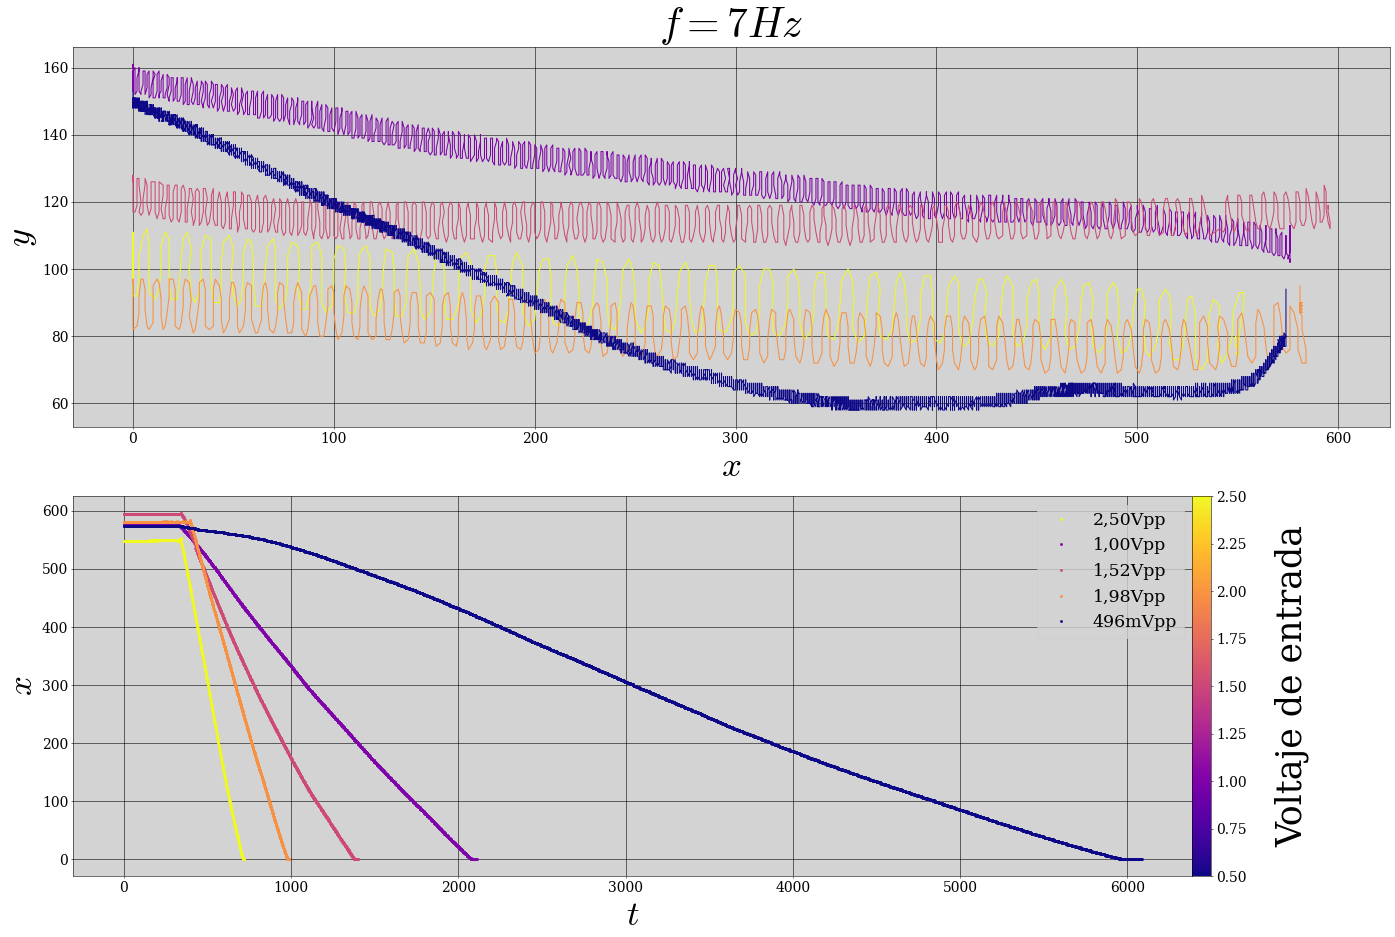

In [58]:


norm = plt.Normalize(0.5,2.5)
cmap = plt.colormaps.get_cmap('plasma')
colorscale = plt.cm.ScalarMappable(norm, cmap)

fig, [ax1, ax2] = plt.subplots(2, 1)

for filename in os.listdir('ECO20-45mm'):
    df = pd.read_csv(f'ECO20-45mm/{filename}')
    
    s = filename.split('.')[0].split('-')
    v,f = s[0],s[1]
    vval = (float(v.split('V')[0].replace(',','.')) if 'mV' not in v else float(v.split('mV')[0].replace(',','.'))*1e-3)
    t,x,y = df['t'], df['x'], df['y']
    
    if f=='7Hz':
        ax1.plot(x, y, color = cmap(norm(vval)) )
        ax2.plot(t[:len(x)], x, '.',label=f'{v}', color = cmap(norm(vval)) )  
        
        
cbar_term = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax2, location='right', orientation='vertical', pad=0)
cbar_term.ax.set_ylim(0.5,2.5)
cbar_term.ax.ticklabel_format(axis='x',style='sci',scilimits=(0,2))
cbar_term.ax.set_ylabel('Voltaje de entrada',labelpad=40)

ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

ax2.set_xlabel('$t$')
ax2.set_ylabel('$x$')

ax2.legend()
fig.tight_layout()
ax1.set_title('$f=7Hz$')
fig.savefig('7Hz-comparación.svg', bbox_inches='tight')